In [1]:
import requests
import pandas as pd
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [3]:
# The base URL of the API endpoint
url = "https://api.nasa.gov/planetary/apod"

In [11]:
# Your API key
api_key = "BnCGRb7t21ydEh1tBXdtyBaXRi7ELee2HzyiUbyx"

In [13]:
# Parameters for the API request, including the API key
params = {
    'api_key': api_key
}

In [15]:
# Send a GET request to the API
response = requests.get(url, params=params)

# Check if the request was successful
response.status_code == 200

True

In [17]:
# Display the weather data as JSON
response.json()

{'copyright': '\nInfrared: NASA, \nSpitzer Space Telescope;\nVisible: \nOliver Czernetz, \nSiding Spring Obs.\n',
 'date': '2025-04-20',
 'explanation': "The Great Nebula in Orion is a colorful place.  Visible to the unaided eye, it appears as a small fuzzy patch in the constellation of Orion.  Long exposure, multi-wavelength images like this, however, show the Orion Nebula to be a busy neighborhood of young stars, hot gas, and dark dust.  This digital composite features not only three colors of visible light but four colors of infrared light taken by NASA's orbiting Spitzer Space Telescope as well.  The power behind much of the Orion Nebula (M42) is the Trapezium - four of the brightest stars in the nebula.  Many of the filamentary structures visible are actually shock waves - fronts where fast moving material encounters slow moving gas.  The Orion Nebula spans about 40 light years and is located about 1500 light years away in the same spiral arm of our Galaxy as the Sun.",
 'hdurl': 

In [19]:
data = response.json()

In [21]:
# Get the image URL
image_url = data['url']

In [23]:
# Request the image
img_response = requests.get(image_url)

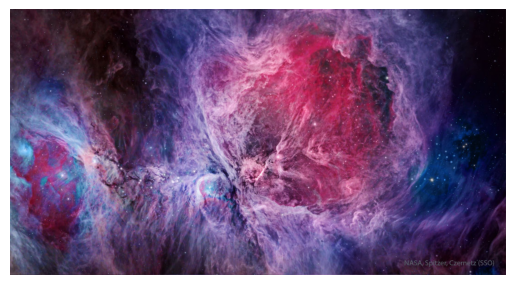

Title: The Orion Nebula in Visible and Infrared
Date: 2025-04-20
Explanation: The Great Nebula in Orion is a colorful place.  Visible to the unaided eye, it appears as a small fuzzy patch in the constellation of Orion.  Long exposure, multi-wavelength images like this, however, show the Orion Nebula to be a busy neighborhood of young stars, hot gas, and dark dust.  This digital composite features not only three colors of visible light but four colors of infrared light taken by NASA's orbiting Spitzer Space Telescope as well.  The power behind much of the Orion Nebula (M42) is the Trapezium - four of the brightest stars in the nebula.  Many of the filamentary structures visible are actually shock waves - fronts where fast moving material encounters slow moving gas.  The Orion Nebula spans about 40 light years and is located about 1500 light years away in the same spiral arm of our Galaxy as the Sun.


In [25]:
# Open the image and display it using matplotlib
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)
plt.axis('off')
plt.show()
# Display the image and some info
print("Title:", data['title'])
print("Date:", data['date'])
print("Explanation:", data['explanation'])

In [27]:
neo_url = "https://api.nasa.gov/neo/rest/v1/feed"

In [29]:
# Parameters for the API request (retrieves asteroids for a range of dates)
neo_params = {
    'start_date': '2023-10-01',  # Specify the date range you want
    'end_date': '2023-10-02',
    'api_key': api_key
}

In [31]:
# Send a GET request to the NeoWs API
neo_response = requests.get(neo_url, params=neo_params)

In [33]:
# Check if the request was successful
if neo_response.status_code == 200:
    neo_data = neo_response.json()
    
    # Extract the asteroid data from the response
    asteroids = []
    for date, neo_objects in neo_data['near_earth_objects'].items():
        for obj in neo_objects:
            asteroid = {
                'Asteroid ID': obj['id'],
                'Asteroid Name': obj['name'],
                'Minimal Estimated Diameter (km)': obj['estimated_diameter']['kilometers']['estimated_diameter_min'],
                'Absolute Magnitude': obj['absolute_magnitude_h'],
                'Relative Velocity (km/s)': obj['close_approach_data'][0]['relative_velocity']['kilometers_per_second']
            }
            asteroids.append(asteroid)
    
    # Create a pandas DataFrame from the extracted data
    df = pd.DataFrame(asteroids)
    
    # Display the DataFrame
    df
    
else:
    print(f"Error: {neo_response.status_code}")

In [35]:
df.head()

,Asteroid ID,Asteroid Name,Minimal Estimated Diameter (km),Absolute Magnitude,Relative Velocity (km/s)
0,2137084,137084 (1998 XS16),1.344482,16.48,18.0203377818
1,2252399,252399 (2001 TX44),0.348783,19.41,13.1737646759
2,3342645,(2006 SG7),0.071871,22.84,11.2074516962
3,3451020,(2009 EG3),0.145397,21.31,19.7494474735
4,3606252,(2012 OO),0.197950,20.64,9.4421469919


In [37]:
df.to_csv('final_df.csv', index=False)
